# Import Libraries and Dataset

In [1]:
#import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
from pandas import Series
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#load the data set and view the first five rows
df = pd.read_csv("zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [4]:
df.City.value_counts()

New York        114
Los Angeles      95
Houston          88
San Antonio      48
Washington       45
               ... 
Frostburg         1
Lonaconing        1
Mountainside      1
Hunlock           1
Beggs             1
Name: City, Length: 7554, dtype: int64

In [5]:
#Get infor for CLT
df = df.loc[df['City'] == 'Charlotte']
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,184700,186600,188200,189800,191700,193500,195100,196600,198500,199700
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,144200,145500,146900,148700,150600,152300,153700,155300,157400,159000
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,222800,227100,231600,236500,241800,247100,251500,256300,262000,265900
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,151200,153400,155500,157400,159600,162000,163800,165700,168100,169900


In [6]:
#view the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
5321,79389,48813,Charlotte,MI,Lansing,Eaton,5322,74600.0,75200.0,75800.0,...,123400,123800,124400,125200,125800,126600,127500,128400,129500,130400
7905,69767,28204,Charlotte,NC,Charlotte,Mecklenburg,7906,153100.0,153200.0,153400.0,...,529500,531300,536000,543000,550600,560300,570500,576400,580200,583400
8528,69770,28207,Charlotte,NC,Charlotte,Mecklenburg,8529,406100.0,408700.0,411200.0,...,1167700,1177300,1186700,1195300,1205900,1216100,1225200,1230900,1235400,1238000
10248,74122,37036,Charlotte,TN,Nashville,Dickson,10249,38800.0,39200.0,39600.0,...,120700,120600,120600,120400,120300,120700,121100,122800,126600,130000
13465,63729,14782,Charlotte,NY,Jamestown,Chautauqua,13466,52900.0,52700.0,52600.0,...,78500,77200,76200,76400,77800,78000,76500,77000,79900,81600


In [7]:
#Drop all states except NC
df = df.drop(df[(df['State'] != 'NC')].index)
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,184700,186600,188200,189800,191700,193500,195100,196600,198500,199700
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,144200,145500,146900,148700,150600,152300,153700,155300,157400,159000
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,222800,227100,231600,236500,241800,247100,251500,256300,262000,265900
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,151200,153400,155500,157400,159600,162000,163800,165700,168100,169900


In [8]:
#check the dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 24 to 8528
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 46.9+ KB


In [9]:
#check for NaN values
df.isna().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [10]:
#calculate ROI
df['ROI'] = ((df['2018-04']-df['1996-04'])/df['1996-04'])
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,186600,188200,189800,191700,193500,195100,196600,198500,199700,0.583664
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,349500,350500,352500,355400,357900,359900,361900,363800,364800,0.983687
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,145500,146900,148700,150600,152300,153700,155300,157400,159000,0.640867
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,227100,231600,236500,241800,247100,251500,256300,262000,265900,2.607870
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,153400,155500,157400,159600,162000,163800,165700,168100,169900,0.714430


In [11]:
#calculate standard deviation of monthly values
df['std'] = df.loc[:,'1996-04':'2018-04'].std(skipna=True, axis=1)
#calculate mean values
df['mean'] = df.loc[:,'1996-04':'2018-04'].mean(skipna=True, axis=1)
#calculate coefficient of variance
df['Risk'] = df['std']/df['mean']
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,Risk
24,69816,28269,Charlotte,NC,Charlotte,Mecklenburg,25,126100.0,126600.0,127100.0,...,191700,193500,195100,196600,198500,199700,0.583664,14388.195085,149058.867925,0.096527
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,355400,357900,359900,361900,363800,364800,0.983687,44584.681196,254089.811321,0.175468
392,69779,28216,Charlotte,NC,Charlotte,Mecklenburg,393,96900.0,97100.0,97200.0,...,150600,152300,153700,155300,157400,159000,0.640867,14281.239768,115181.132075,0.123989
409,69768,28205,Charlotte,NC,Charlotte,Mecklenburg,410,73700.0,74200.0,74800.0,...,241800,247100,251500,256300,262000,265900,2.607870,35972.146020,129007.169811,0.278838
442,69778,28215,Charlotte,NC,Charlotte,Mecklenburg,443,99100.0,99800.0,100500.0,...,159600,162000,163800,165700,168100,169900,0.714430,13075.220979,120724.528302,0.108306


In [12]:
#get the 5 zipcodes with highest ROI and the lowest risk - variation below 50
df_risk = df.Risk.quantile(.6)
df = df[df['Risk'] < df_risk].sort_values('ROI',axis=0,ascending=False)[:5]
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI,std,mean,Risk
2666,69817,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,185700.0,186300.0,186800.0,...,367600,370000,372300,374800,377700,379200,1.042003,47820.019841,259195.471698,0.184494
55,69823,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,...,355400,357900,359900,361900,363800,364800,0.983687,44584.681196,254089.811321,0.175468
1821,69771,28208,Charlotte,NC,Charlotte,Mecklenburg,1822,59000.0,59300.0,59500.0,...,99800,102800,105100,107300,110700,113400,0.922034,12446.368365,71224.528302,0.174748
1502,69775,28212,Charlotte,NC,Charlotte,Mecklenburg,1503,88700.0,89100.0,89600.0,...,156500,158600,161000,163800,166600,168400,0.898534,15048.275062,112088.301887,0.134254
3791,69780,28217,Charlotte,NC,Charlotte,Mecklenburg,3792,71200.0,71700.0,72200.0,...,118800,120600,122200,123600,125300,126800,0.780899,11705.454813,90185.660377,0.129793


In [13]:
#remove unnecessary columns before melting the data
df.drop('RegionID', axis=1, inplace=True)
df.drop('ROI', axis=1, inplace=True)
df.drop('std', axis=1, inplace=True)
df.drop('mean', axis=1, inplace=True)
df.drop('Risk', axis=1, inplace=True)
df

,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
2666,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,185700.0,186300.0,186800.0,187300.0,...,358600,361000,363400,365400,367600,370000,372300,374800,377700,379200
55,28277,Charlotte,NC,Charlotte,Mecklenburg,56,183900.0,185100.0,186300.0,187300.0,...,348100,349500,350500,352500,355400,357900,359900,361900,363800,364800
1821,28208,Charlotte,NC,Charlotte,Mecklenburg,1822,59000.0,59300.0,59500.0,59800.0,...,92000,94500,96200,97500,99800,102800,105100,107300,110700,113400
1502,28212,Charlotte,NC,Charlotte,Mecklenburg,1503,88700.0,89100.0,89600.0,90000.0,...,149400,151100,152500,154400,156500,158600,161000,163800,166600,168400
3791,28217,Charlotte,NC,Charlotte,Mecklenburg,3792,71200.0,71700.0,72200.0,72700.0,...,111500,113900,116400,117800,118800,120600,122200,123600,125300,126800


In [20]:
#Melt data to get the years and months under one column 'Date'
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'], var_name='Date')
    melted['Date'] = pd.to_datetime(melted['Date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('Date').aggregate({'value':'mean'})

In [21]:
#Create dataframe for new melted data
def melt_df(df):
    merged = []
    for zipcode in df.RegionName:
        melted = melt_data(df.loc[df['RegionName'] == zipcode])
        row = df.loc[df['RegionName'] == zipcode].iloc[:,:6]
        rows = pd.concat([row]*len(melted), ignore_index=True)
        merge = pd.concat([rows, melted.reset_index()], axis= 1)
        merged.append(merge)
    melted_df = pd.concat(merged)
    return melted_df

In [22]:
#reshape from wide to long format and view the first 5 rows
df = melt_df(df)
df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,Date,value
0,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,1996-04-01,185700.0
1,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,1996-05-01,186300.0
2,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,1996-06-01,186800.0
3,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,1996-07-01,187300.0
4,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,1996-08-01,187600.0


# EDA

In [18]:
#Convert time to a datetime column
df.time = pd.to_datetime(df.time, format='%m/%y')

In [19]:
df.set_index('time', inplace = True)
df.head()

,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,185700.0
1996-05-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,186300.0
1996-06-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,186800.0
1996-07-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,187300.0
1996-08-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,187600.0


In [20]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1325 entries, 1996-04-01 to 2018-04-01
Data columns (total 7 columns):
RegionName    1325 non-null int64
City          1325 non-null object
State         1325 non-null object
Metro         1325 non-null object
CountyName    1325 non-null object
SizeRank      1325 non-null int64
value         1325 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 82.8+ KB


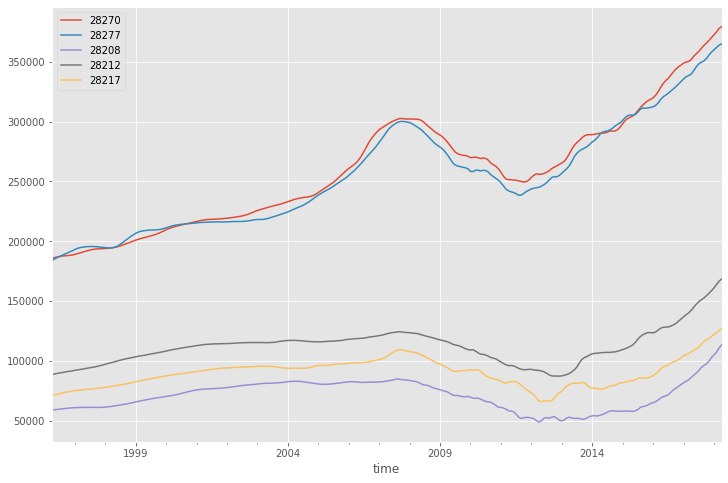

In [21]:
#plot the values grouped by zipcode
plt.figure(figsize=(12,8))
for zipcode in df.RegionName.unique():
    df.loc[df['RegionName'] == zipcode].value.plot(label=zipcode)
plt.legend()
plt.show()

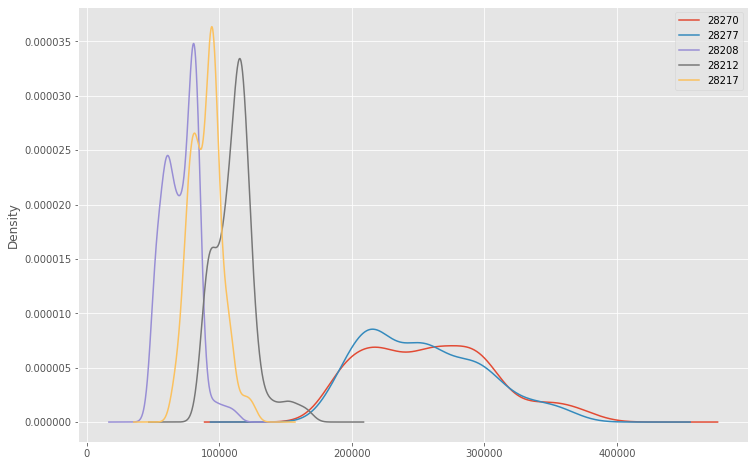

In [22]:
#create a time-series density plot
plt.figure(figsize=(12,8))
for zipcode in df.RegionName.unique():
    df.loc[df['RegionName'] == zipcode].value.plot(kind = 'kde', label=zipcode)
plt.legend()
plt.show()

Except for South Park (28270) and Ballantyne (28277), which show a Gaussian like distribution, the other three zip codes are more skewed.




In [23]:
#create a new dataframe containing 1 zipcode to check for seaonailty and trend
df1 = df.loc[df['RegionName'] == 28270]
df1.head()

,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,
1996-04-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,185700.0
1996-05-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,186300.0
1996-06-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,186800.0
1996-07-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,187300.0
1996-08-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,187600.0


In [24]:
df1.tail()

,RegionName,City,State,Metro,CountyName,SizeRank,value
time,,,,,,,
2017-12-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,370000.0
2018-01-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,372300.0
2018-02-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,374800.0
2018-03-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,377700.0
2018-04-01,28270,Charlotte,NC,Charlotte,Mecklenburg,2667,379200.0


In [23]:
#drop unnecessary columns
df1.drop('RegionName', axis=1, inplace=True)
df1.drop('City', axis=1, inplace=True)
df1.drop('State', axis=1, inplace=True)
df1.drop('Metro', axis=1, inplace=True)
df1.drop('CountyName', axis=1, inplace=True)
df1.drop('SizeRank', axis=1, inplace=True)
df1.head()

,value
time,
1996-04-01,185700.0
1996-05-01,186300.0
1996-06-01,186800.0
1996-07-01,187300.0
1996-08-01,187600.0


## Decomposition

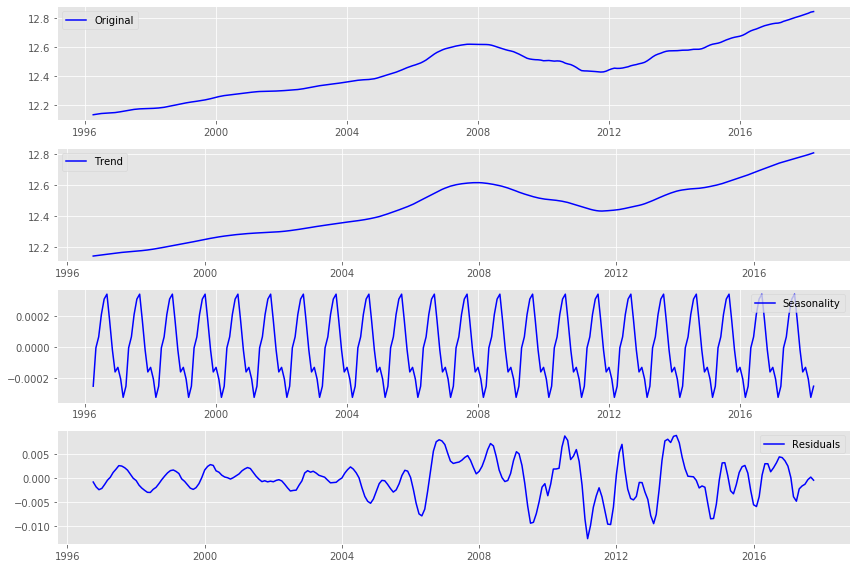

In [24]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(np.log(df1))

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(np.log(df1), label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [25]:
#perform the check_stationarity function
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['value']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

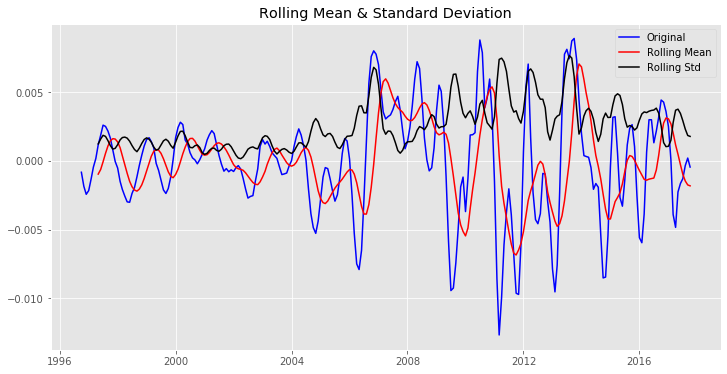

Results of Dickey-Fuller Test:
Test Statistic                  -3.130675
p-value                          0.024365
#Lags Used                      15.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [26]:
# Drop NaN values from residuals.
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(ts_log_decompose)

The time series seems to be stationary based on the test statistic, which is below 0.01.

## ARIMA Model

In [27]:
#define the p, d and q parameters to take any value between 0 and 2
P = D = Q = range(0, 2)

#generate all different combinations of p, q and q triplets
PDQ = list(itertools.product(P, D, Q))

#generate all different combinations of seasonal p, q and q triplets
PDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [28]:
#run a grid with PDQ and seasonal PDQ parameters calculated above and get the best AIC value
ans = []
for comb in PDQ:
    for combs in PDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(df1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =7342.205127644744
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =6848.760536377207
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =5588.969449081511
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =5334.764277595171
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =5520.812821203368


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =5495.315649970475
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =5192.720623095804


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =5173.9662404187575
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =7124.322134444714


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =6756.3428356398945
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =5589.196951687609


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was

ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =5003.43885440679
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =6789.059182346755
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =6737.333697098771


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =5580.4396159549715


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =6633.120854038725
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =4585.037731762277
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =4319.460443321872
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4362.710362615762


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =4154.407466685443
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =4325.7335183577625
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =4312.4843603055215
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =4167.364623550297


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =4151.870415078982
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =4278.347435712508


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =4043.166581156998


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =4221.935569822319


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =3903.613577594324


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =4125.545550135113


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =4045.110765699404


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =3978.4968342932198


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3902.363281361172
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =4515.414667296328


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =4287.755168469808
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =4380.989852053735


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =4176.724732301195
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =4291.060911212828


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =4289.726625093999


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =4168.869381380044


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =4170.2092790296065
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =4291.585480350073


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =4092.364718725937


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =4299.558042220533


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =3944.1073467012097
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =4119.0351989833725


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =4113.220076765892
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =3979.040183413507


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =4227.713269793738
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =3964.2707949366513
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =3767.436091163704
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =4015.5035722734874


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =3798.210055917261
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =3772.661571480835


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =3752.099038646178


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =3758.715984096557


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =3758.422698883357
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =3911.881467792556
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =3709.322917026634


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =3974.55048347203


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =3702.4446272270816
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =3749.1644291840466


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =3709.6945031779787


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =3770.9949534940765


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =3646.966212141956


In [29]:
#find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['PDQ', 'PDQs', 'AIC'])
ans_df.loc[ans_df['AIC'].idxmin()]

PDQ         (1, 1, 1)
PDQs    (1, 1, 1, 12)
AIC           3646.97
Name: 63, dtype: object

The lowest AIC value of 3246.97 is produced by the combination of (1,1,1)x(0,1,1,12). That is why we will select the above model to proceed further.

In [30]:
#put the optimal parameters into the SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8366      0.028     29.521      0.000       0.781       0.892
ma.L1          0.4790      0.035     13.655      0.000       0.410       0.548
ma.S.L12      -0.4320      0.028    -15.267      0.000      -0.487      -0.377
sigma2      2.657e+05   1.97e+04     13.470      0.000    2.27e+05    3.04e+05


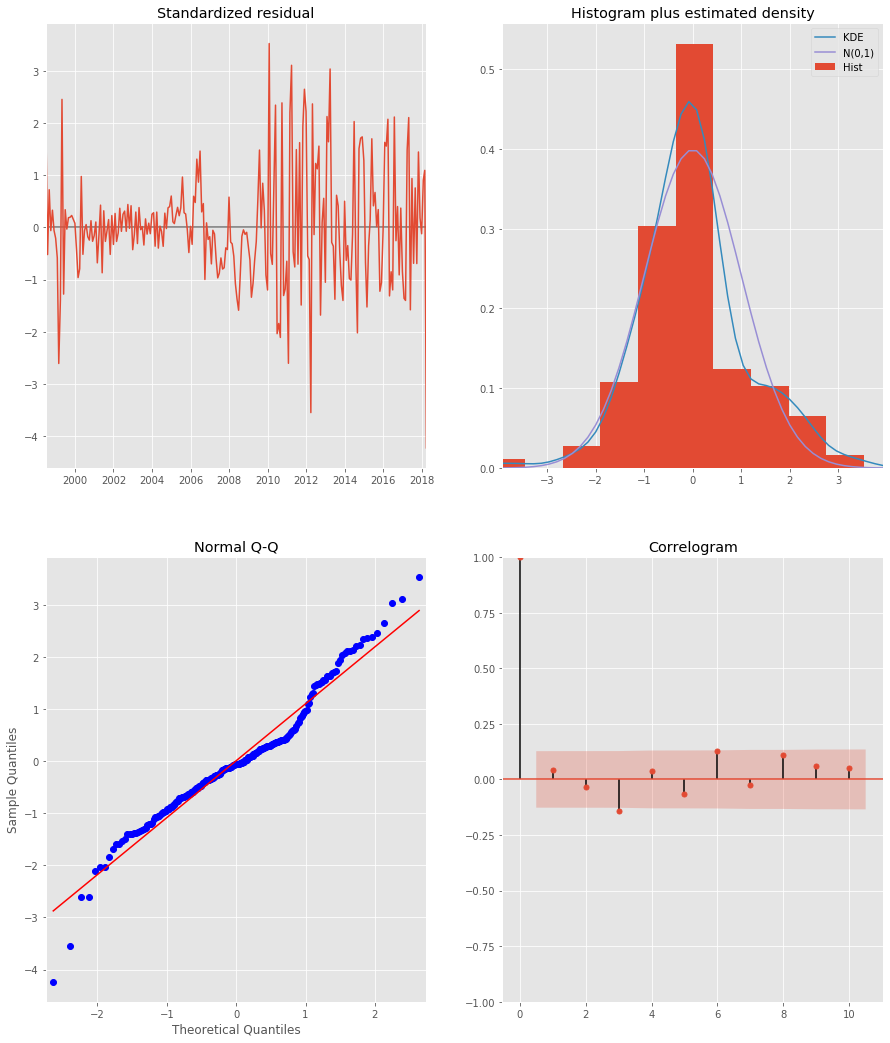

In [31]:
#use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

Our goal is to make sure that residuals are uncorrelated, normally distributed and have zero mean. 

Based on the histogram and the fact that the KDE line follows the N(0,1) line pretty closely, we conclude that the residuals are normally distributed.

In the qq-plot, the residuals follow the linear trend, which shows they are normally distributed.

The residuals over time look like white noise and do not show any obvious seasonality.

The correlogram shows that residuals have some correlation with lagged version of themselves.

To understand the accuracy of the forecast and validate the model, we need to compare the actual time series values to the predicted values. In this research we will use one-step ahead forecasts which means we'll be using full history to generate predictions, i.e. the forecast is not dynamic.

In [32]:
#get predictions starting from 2016-01-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

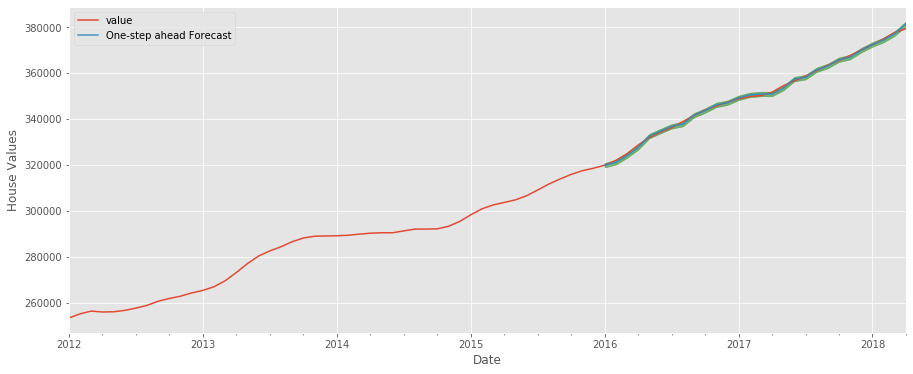

In [33]:
#Plotting the real values, the forecasted values and the confidence interval

#plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

#plot observed values
ax = df1['2012-01-01':].plot(label='observed')

#plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

The forecast is aligned with the actuals. To check for accuracy, we are going to calculate Mean Squared Error (MSE).

In [34]:
#get the real and predicted values
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':].value

#compute the mean square error
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 541918.88


The mean squared error is significant. Let's go back to our model and check for the second lowest AIC value.

In [35]:
#put the optimal parameters into the SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9104      0.021     43.610      0.000       0.869       0.951
ma.L1          0.2765      0.036      7.730      0.000       0.206       0.347
ar.S.L12       0.1122      0.012      8.997      0.000       0.088       0.137
ma.S.L12      -0.9773      0.168     -5.801      0.000      -1.308      -0.647
sigma2      1.773e+05   3.23e+04      5.494      0.000    1.14e+05    2.41e+05


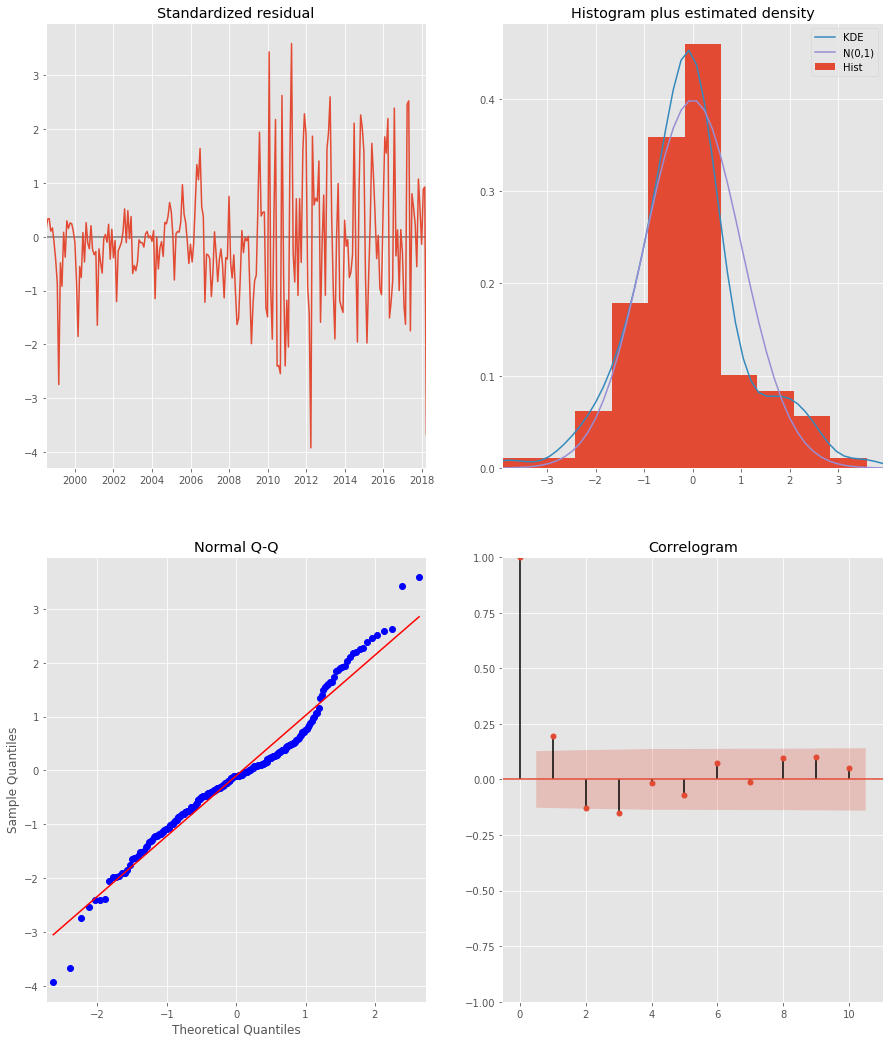

In [36]:
#use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

With the second model, KDE is on point, showing a normal distribution with mean 0 and deviation of 1. The correlogram demonstrates low correlation between residuals.

Let's move on to predictions.

In [37]:
#get predictions starting from 2016-01-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

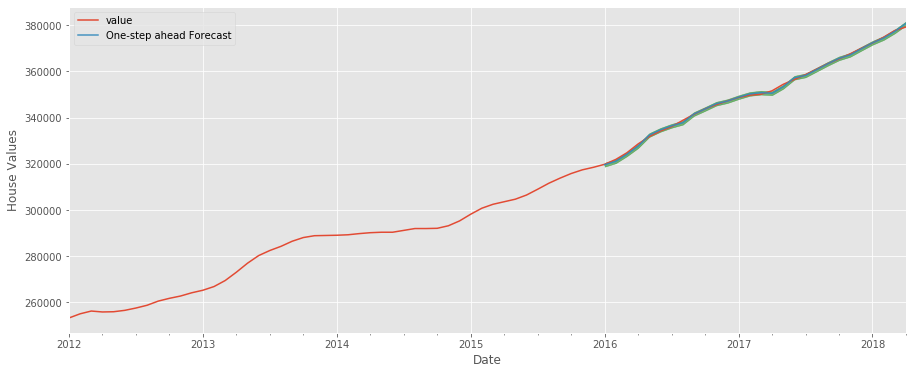

In [38]:
#plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

#plot observed values
ax = df1['2012-01-01':].plot(label='observed')

#plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

In [39]:
#get the real and predicted values
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':].value

#compute the mean square error
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 390011.71


In [40]:
#put the optimal parameters into the SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(df1,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9706      0.015     65.569      0.000       0.942       1.000
ma.L1          0.3625      0.046      7.821      0.000       0.272       0.453
ar.S.L12       0.0547      0.080      0.687      0.492      -0.101       0.211
ma.S.L12      -0.5272      0.082     -6.437      0.000      -0.688      -0.367
sigma2      1.497e+05   1.07e+04     14.013      0.000    1.29e+05    1.71e+05


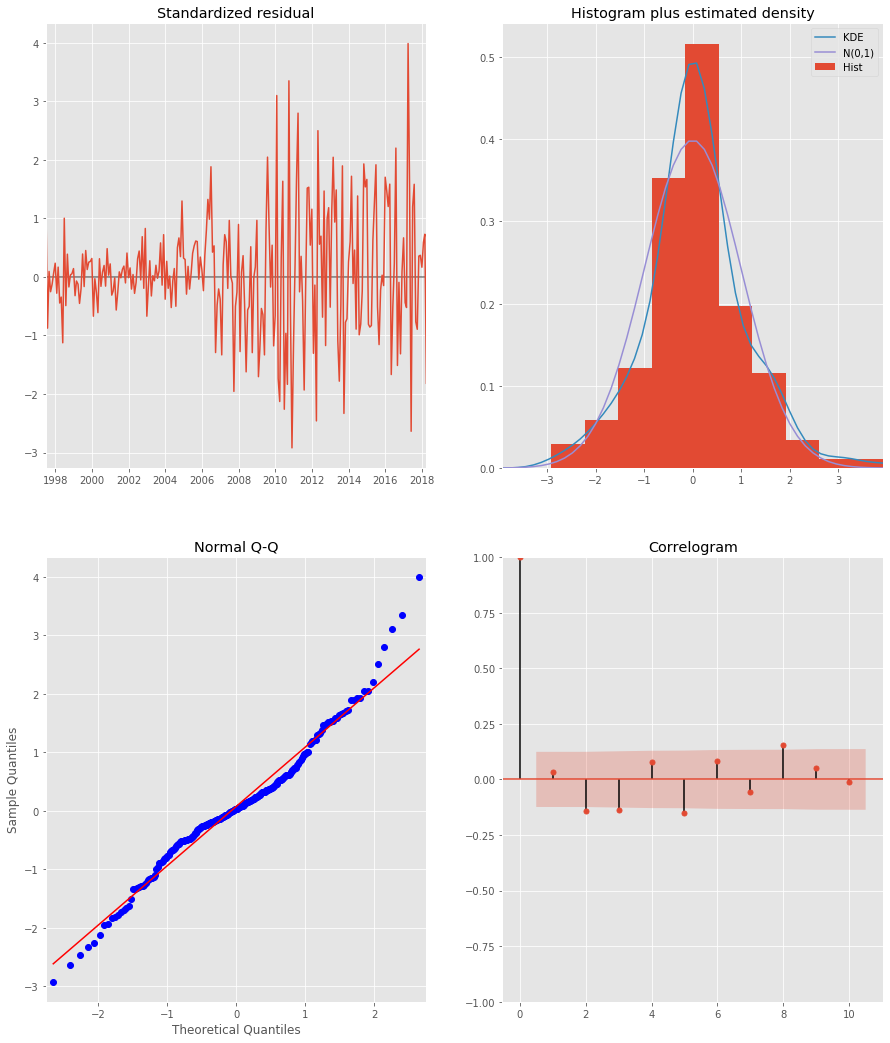

In [41]:
#use plot_diagnostics with results calculated above.
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [42]:
#get predictions starting from 2016-01-01 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

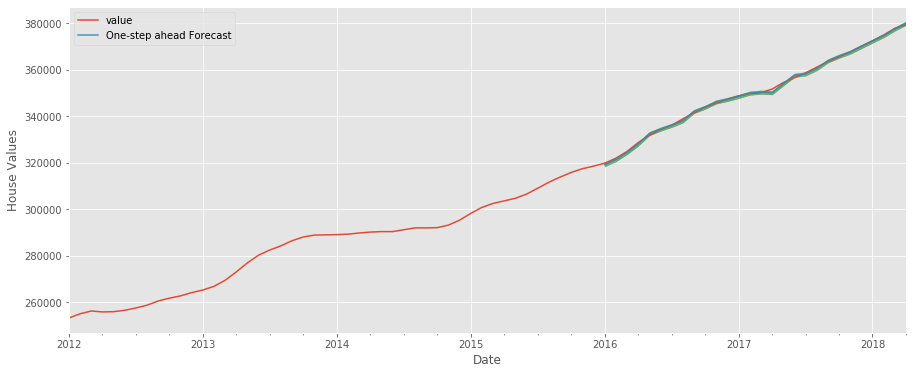

In [43]:
#plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15, 6

#plot observed values
ax = df1['2012-01-01':].plot(label='observed')

#plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=.5)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

In [44]:
#get the real and predicted values
df1_forecasted = pred.predicted_mean
df1_truth = df1['2016-01-01':].value

#compute the mean square error
mse = ((df1_forecasted - df1_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 304390.1


This is the lowest mean squared error out of our 3 models. Let's use this model to make predictions.

In [45]:
#get forecast 50 steps ahead in future
prediction = output.get_forecast(steps=50)

#get confidence intervals of forecasts
pred_conf = prediction.conf_int()

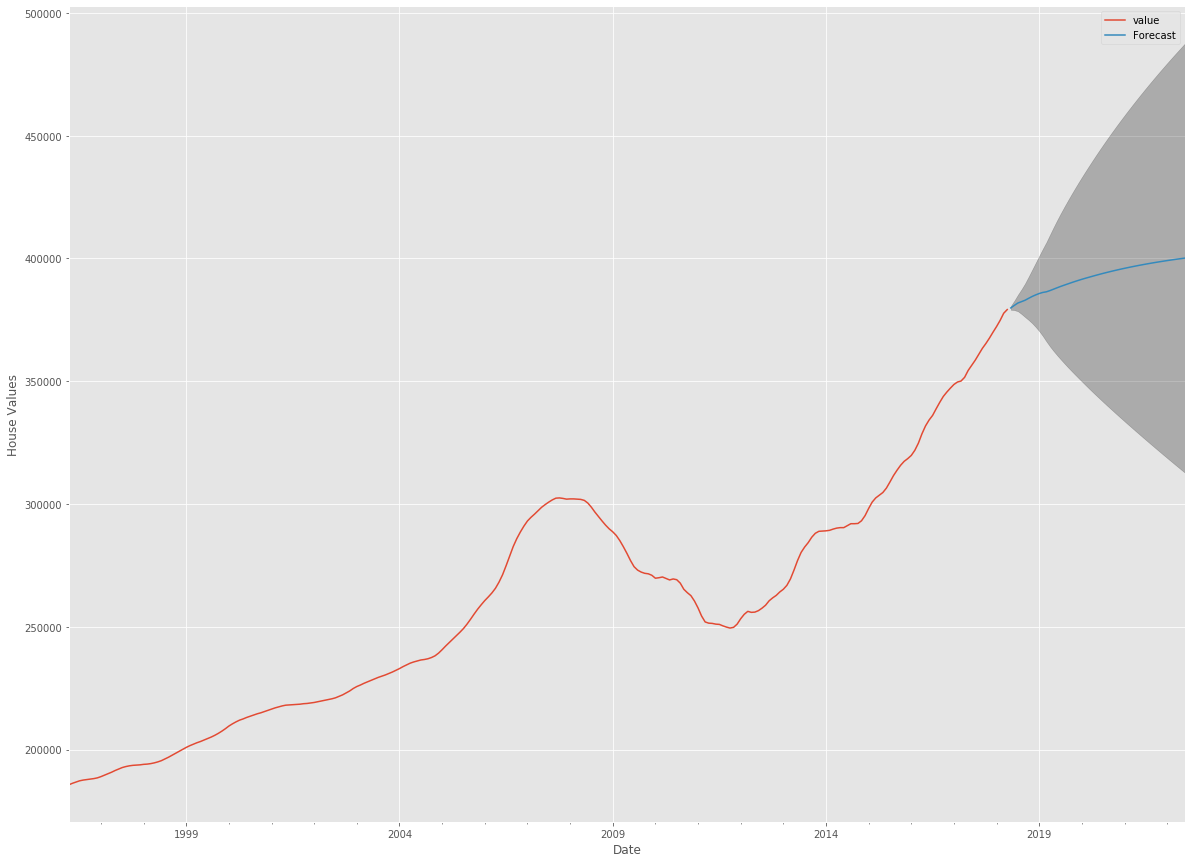

In [46]:
#plot future predictions with confidence intervals

ax = df1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Values')

plt.legend()
plt.show()